Use case: a house price prediction (based on [the Boston dataset](https://archive.ics.uci.edu/ml/datasets/Housing) from UCI Machine Learning Repository).

Models:
<ul>
<li>Linear regression</li>
<li>Regularization: Ridge (L2), Lasso (L1)</li>
</ul>

Algorithms:
<ul>
<li>Gradient descent</li>
<li>Coordinate descent</li>
</ul>

## Linear Regression

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
print boston.data.shape
print boston.DESCR

(506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by t

In [4]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
df['PRICE'] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Linear example

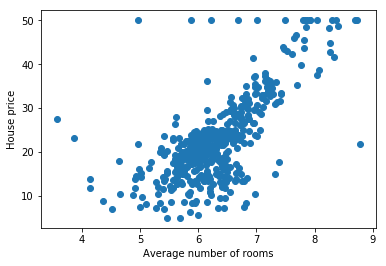

In [6]:
# A scatter plot between house price and average number of rooms
plt.scatter(df.RM, df.PRICE)
plt.xlabel('Average number of rooms') # feature, covariate, predictor or independent variable
plt.ylabel('House price') # observation, response or dependent variable
plt.show()

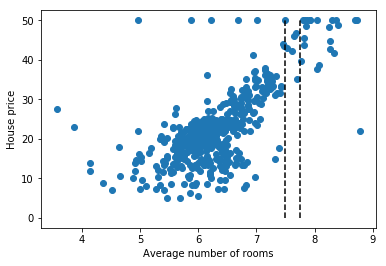

In [7]:
# Predict a new house by similar houses
plt.scatter(df.RM, df.PRICE)
plt.vlines(x=7.5, ymin=0, ymax=50, linestyles='dashed')
plt.vlines(x=7.75, ymin=0, ymax=50, linestyles='dashed')
plt.xlabel('Average number of rooms') 
plt.ylabel('House price') 
plt.show()

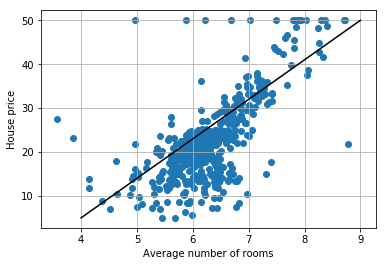

In [8]:
# Fit a line through the data: f_w(x) = w_0 + w_1 x 
plt.scatter(df.RM, df.PRICE)
plt.plot((4,9),(5,50), color='k')
plt.xlabel('Average number of rooms') 
plt.ylabel('House price')
plt.grid()
plt.show()

Line is defined by an intercept $w_0$ and a slope $w_1$,
where $w_1$ is the weight on the feature $X$ and is called the regression coefficient. And what this weight has an interpretation of, is as we vary $X$ (the average #rooms in this case) how much of an impact does that have on changes in the observed house sales price? 

So our model $f_w(x) = w_0 + w_1 x$ is a function parameterized by $w = (w_0, w_1)$ and a question is "Which $w$ to choose?"

Define a 

Line through (4,5) and (9,50): m = (50-5)/(9-4) = 9, y = 9x +b = 9x-31

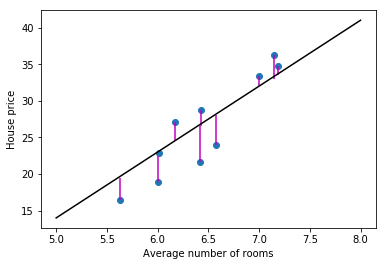

In [9]:
# Cost for a given line: 
# one very common cost associated with a specific fit to the data is the residual sum of squares (RSS)
df_small = df[:10]
df_small = df_small.sort_values(by='RM')
plt.scatter(df_small.RM, df_small.PRICE)
plt.plot((5,8),(14,41), color='k')
plt.vlines(x=df_small.RM[0], ymin=df_small.PRICE[0], ymax=28, color='m')
plt.vlines(x=df_small.RM[1], ymin=df_small.PRICE[1], ymax=26.5, color='m')
plt.vlines(x=df_small.RM[2], ymin=33.5, ymax=df_small.PRICE[2], color='m')
plt.vlines(x=df_small.RM[3], ymin=32, ymax=df_small.PRICE[3], color='m')
plt.vlines(x=df_small.RM[4], ymin=33, ymax=df_small.PRICE[4], color='m')
plt.vlines(x=df_small.RM[5], ymin=26.5, ymax=df_small.PRICE[5], color='m')
plt.vlines(x=df_small.RM[7], ymin=24.5, ymax=df_small.PRICE[7], color='m')
plt.vlines(x=df_small.RM[8], ymin=df_small.PRICE[8], ymax=19.5, color='m')
plt.vlines(x=df_small.RM[9], ymin=df_small.PRICE[9], ymax=22.5, color='m')
plt.xlabel('Average number of rooms') 
plt.ylabel('House price') 
plt.show()

The residual is the difference of your prediction and your actual observation. We need to minimize the residual sum of squares over all possible $w_0$ and $w_1$:

\begin{equation*}
RSS(w_0, w_1) = \sum_{i=1}^n { (p_i - [w_0 + w_1 x_i])^2} \rightarrow min
\end{equation*}

where $p_i$ is an observed price and $x_i$ is a number of rooms of house $i$, $i \in \overline{(1,n)}$.

Denote the resulting $w$ as $\hat{w} = (\hat{w}_0, \hat{w}_1)$, so the best guess of your house price: $\hat{y} = \hat{w}_0 + \hat{w}_1 x$, where x is the #rooms of your house.

We could try a quadratic function $f_w (x) = w_0 + w_1 x + w_2 x^2$ (it's still a linear regression, since we're considering $x^2$ as just an another feature) or even higher order polynomial, so RSS are zero, but => overfitting

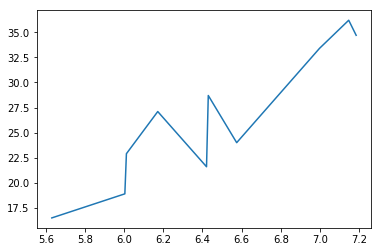

In [10]:
plt.plot(df_small.RM, df_small.PRICE)

### How to choose model order/complexity

Simulate predictions (training/test split): remove some houses, fit model on remaining, predict heldout houses.


Training error$(w) = \sum_{i=1}^k { (p_{\mbox{train }i} - f_w(x_{\mbox{train }i}))^2}$, where k is the size of the training set. Goal: to minimize the training error.

Test error$(\hat{w}) = \sum_{i=1}^m { (p_{\mbox{test }i} - f_\hat{w}(x_{\mbox{test }i}))^2}$, where m is the size of the test set.

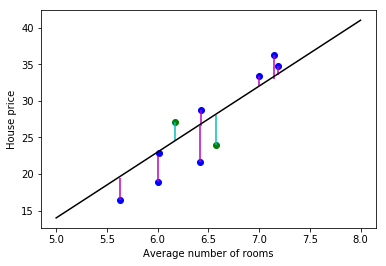

In [11]:
df_small_train = df_small[(df_small.RM != 6.172) & (df_small.RM != 6.575)]
df_small_test = df_small[(df_small.RM == 6.172) | (df_small.RM == 6.575)]

plt.scatter(df_small_train.RM, df_small_train.PRICE, color='b')
plt.scatter(df_small_test.RM, df_small_test.PRICE, color='g')

plt.plot((5,8),(14,41), color='k')
plt.vlines(x=df_small_train.RM[1], ymin=df_small_train.PRICE[1], ymax=26.5, color='m')
plt.vlines(x=df_small_train.RM[2], ymin=33.5, ymax=df_small_train.PRICE[2], color='m')
plt.vlines(x=df_small_train.RM[3], ymin=32, ymax=df_small_train.PRICE[3], color='m')
plt.vlines(x=df_small_train.RM[4], ymin=33, ymax=df_small_train.PRICE[4], color='m')
plt.vlines(x=df_small_train.RM[5], ymin=26.5, ymax=df_small_train.PRICE[5], color='m')
plt.vlines(x=df_small_train.RM[8], ymin=df_small_train.PRICE[8], ymax=19.5, color='m')
plt.vlines(x=df_small_train.RM[9], ymin=df_small_train.PRICE[9], ymax=22.5, color='m')

plt.vlines(x=df_small_test.RM[0], ymin=df_small_test.PRICE[0], ymax=28, color='c')
plt.vlines(x=df_small_test.RM[7], ymin=24.5, ymax=df_small_test.PRICE[7], color='c')

plt.xlabel('Average number of rooms') 
plt.ylabel('House price') 
plt.show()

<img style="float: left;" src="train_test_curve.jpg" width="40%" height="40%">

http://scott.fortmann-roe.com/docs/BiasVariance.html

### Using scikit-learn

In [12]:
import sklearn

In [13]:
from sklearn.linear_model import LinearRegression

X = df.drop('PRICE', axis = 1) # all independent variables
y = df.PRICE # houses proces

In [14]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state = 5) 

In [15]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)
pred_train = regressor.predict(X_train)
pred_test = regressor.predict(X_test)

In [16]:
print "Estimated intercept coefficient: ", regressor.intercept_
print "Number of coefficients: ", len(regressor.coef_)

Estimated intercept coefficient:  32.8589326341
Number of coefficients:  13


In [17]:
pd.DataFrame(zip(X.columns, regressor.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.156381
1,ZN,0.038549
2,INDUS,-0.025063
3,CHAS,0.786440
4,NOX,-12.946912
5,RM,4.002689
6,AGE,-0.011602
7,DIS,-1.368288
8,RAD,0.341757
9,TAX,-0.013515


Note: there is a high correlation between RM (average number of rooms per dwelling) and prices.

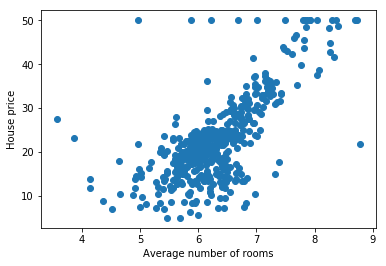

In [18]:
# A scatter plot between true houses prices and true RM
plt.scatter(df.RM, df.PRICE)
plt.xlabel('Average number of rooms')
plt.ylabel('House price')
plt.show()

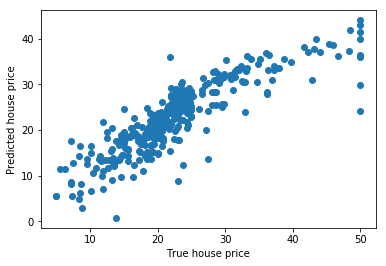

In [19]:
# A scatter plot between true and predicted houses prices
plt.scatter(y_train, pred_train)
plt.xlabel('True house price')
plt.ylabel('Predicted house price')
plt.show()

In [20]:
# Calculate MSE
print "Train dataset: ", np.mean((y_train - pred_train)**2)
print "Test dataset: ", np.mean((y_test - pred_test)**2)

Train dataset:  19.5467584735
Test dataset:  28.5413672756


In [21]:
y_train.shape

(339,)

In [22]:
# Let's take only one feature
lr2 = regressor.fit(X[['PTRATIO']][:339], y_train)

In [23]:
print np.mean((y_train - lr2.predict(X[['PTRATIO']][:339]))**2)

79.7830740703


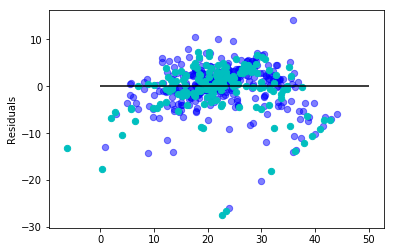

In [24]:
# Residual plot
plt.scatter(pred_train, pred_train - y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - y_test, c='c', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel('Residuals')
plt.show()

If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maybe be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data.

### Using TensorFlow

In [25]:
import tensorflow as tf

def read_dataset(filePath,delimiter=','):
    """
    Load data from a text file to a numpy array
    """
    return np.genfromtxt(filePath, delimiter=delimiter)

def read_boston_data():
    """
    Returns features and labels separately
    """
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

def feature_normalize(dataset):
    """
    Features normalization
    """
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def append_bias_reshape(features,labels):
    """
    Bias term adding (all 1's) + reshaping
    """
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

In [26]:
# Load and split the data set
features,labels = read_boston_data()
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

In [27]:
# Variables initialization
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.global_variables_initializer()

In [28]:
# Linear Regression model
y_ = tf.matmul(X, W) # prediction
cost = tf.reduce_mean(tf.square(y_ - Y)) # loss function
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [29]:
# Model training
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))

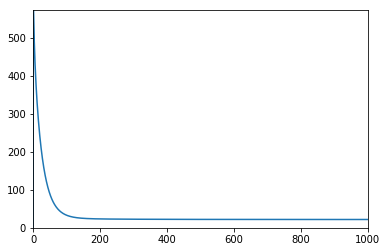

In [30]:
# Plot the cost as a function of #iterations
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

In [31]:
# MSE calculation
pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

MSE: 23.9171


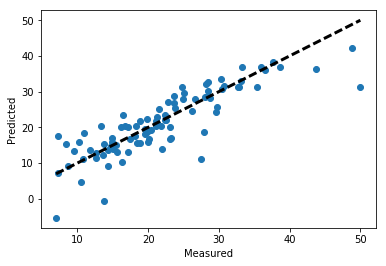

In [32]:
# Plot the original and predicted prices
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3) # learned regression line
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [33]:
sess.close()